In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

import seaborn as sns

In [12]:
data1_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/data1.csv"
target1_path = "/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/target1.csv"
os.path.exists(target1_path)

True

# Exercice 2 

## Question 1

In [14]:
## Chargement des données et visualisation 
data1 = pd.read_csv(data1_path)
target1 = pd.read_csv(target1_path)
data1.sample(4)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
157,0.452356,-0.749858,0.681463,0.407226,NaN,-0.657972,0.228766,0.298678,0.024656,0.263245,-0.697372,0.244616,1.748846,-0.049115,0.150084,NaN,0.588739,-0.011574,-0.039197,0.903861
200,-0.509741,0.782106,-0.637318,-0.382338,-0.555683,0.356665,-0.301145,-0.007562,-0.041409,-1.136418,NaN,-1.922877,1.502186,-0.010069,-0.955072,-0.461532,-0.560979,-0.149254,-0.601282,-1.354481
131,1.236999,1.897003,1.248588,1.719894,0.285578,1.115481,0.851735,1.645744,2.015907,1.245740,-0.149010,1.816042,-0.389137,1.883076,1.560458,0.511448,0.334578,1.034042,1.281172,2.216691
389,0.761886,0.152182,NaN,0.729819,0.839755,NaN,0.858485,0.755505,0.681418,0.523110,-0.038955,0.263946,0.198305,0.709561,0.581724,0.801551,0.617172,0.743538,0.841674,0.260418


In [15]:
## Utiliser la fonction de l'exercice 1 pour remplacer les valeurs manquantes
data1 = replace_random_value(data1)

Text(0.5, 1.0, 'Matrice de corrélation non signée ')

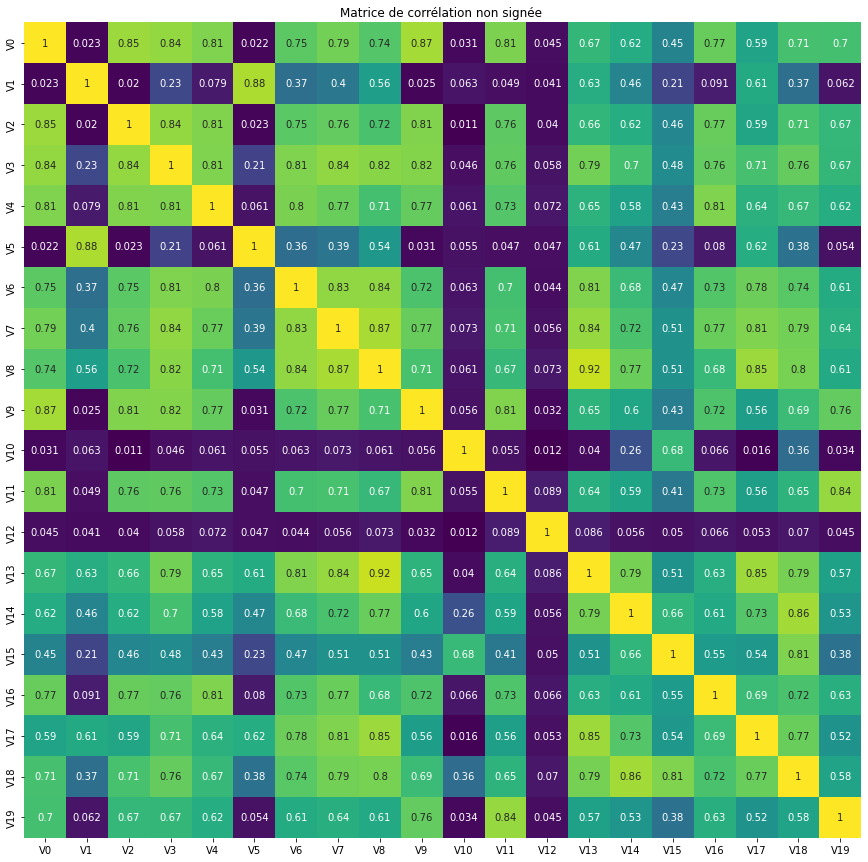

In [26]:
matrix_corr1 = data1.corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(matrix_corr1,annot=True,cmap='viridis',cbar=False)
plt.title("Matrice de corrélation non signée ")


## Question 2

In [67]:
## La matrice matrix_corr1 est symétrique donc nous allons étudier seulement la partie
##triangulaire supérieure pour ne pas rajouter des informations redondantes dans le tableau cause/effet

cause, effet, score  = [],[],[] 
n=len(matrix_corr1)

for i in range(n):
    for j in range(i+1,n):
        score.append(matrix_corr1.iloc[i,j])
        cause.append(matrix_corr1.index[i])
        effet.append(matrix_corr1.columns[j])
             
predictions_network1 = pd.DataFrame(np.array([cause, effet, score]).T,columns=["cause", "effet", "score"])

sorted_index = predictions_network1['score'].sort_values(ascending=False).index
predictions_network1 = predictions_network1.iloc[sorted_index]

predictions_network1.to_csv(os.path.join(os.getcwd(),"predictions_network1.csv"),
                            index=False)

## Question 3

La méthode précédente est un bon point de départ pour la construction d'un arbre de causalité mais elle ne suffit pas pour donner l'inférence correcte et significative du graphe de causalité. La corrélation entre deux variables mesure la relation linéaire entre celles-ci, ce simple indicateur de Pearson ne suffit donc pas à reconstruire le graphe de causalité. En effet les relations entre variables peuvent être plus complexes qu'une seule régression linéaire, parfois l'intervention d'une autre variable dans la causalité interfère le graphe et ne se fait pas nécéssairement ressentir dans l'indice de corrélation. Pour une inférence causale efficace, il est donc crucial d'utiliser des méthodes d'analyse causale plus sophistiquées, qui peuvent prendre en compte ces facteurs et aider à construire un modèle causal plus précis. 

In [83]:
target1["score"] = 1
target1.head(3)

,Cause,Effect,score
0,V0,V2,1
1,V0,V3,1
2,V0,V6,1


In [100]:
pd.set_option('display.max_rows',200)
pd.concat([predictions_network1.set_index(['cause','effet']),target1.set_index(['Cause','Effect'])],
          axis=1,
          ignore_index=False)


,,score,score
V8,V13,0.9170605956327375,1.0
V1,V5,0.8766636809786926,1.0
V7,V8,0.872103299534142,NaN
V0,V9,0.8668424578490582,1.0
V14,V18,0.8626891402573197,1.0
V13,V17,0.8532504368220097,NaN
V8,V17,0.8525447571066526,NaN
V0,V2,0.8517175532517077,1.0
V7,V13,0.8448487265986631,NaN
V11,V19,0.8444319240348496,1.0


Le tableau suivant nous permet de voir que le tableau des corrélations ne nous permet pas de reconstruire le graphe de causalité. En effet, de nombreuses arêtes du vrai graphe apparaissent, cependant il y a aussi beaucoup de liaisons de corrélation fortes qui ne correspondent pas à des relations de causalité.

## Question 4

In [144]:
n = len(matrix_corr1)

causal_matrix = pd.DataFrame(np.zeros((n,n)),index=matrix_corr1.index,columns=matrix_corr1.columns)

for c1,c2 in zip(target1.iloc[:,0].values,target1.iloc[:,1].values):
    causal_matrix.loc[c1][c2] = 1

causal_matrix

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
V0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
V1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
V2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
V3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
V5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
V6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
V7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
V8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
V9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
mask = np.triu(np.ones_like(matrix_corr1, dtype=bool), k=1)
tri_upper_matrix = matrix_corr1.where(mask,0)
tri_upper_matrix

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
V0,0.0,0.023339,0.851718,0.839036,0.810385,0.022440,0.749892,0.790617,0.736207,0.866842,0.030879,0.806406,0.044891,0.665130,0.619533,0.453690,0.768788,0.585484,0.707905,0.704328
V1,0.0,0.000000,0.019726,0.226899,0.079284,0.876664,0.367532,0.402845,0.559895,0.025294,0.062729,0.048892,0.041286,0.628142,0.455252,0.214061,0.091039,0.611090,0.367578,0.061983
V2,0.0,0.000000,0.000000,0.838545,0.812419,0.022895,0.746491,0.760848,0.717101,0.811026,0.010623,0.756242,0.039990,0.661137,0.623352,0.464333,0.771758,0.591919,0.710887,0.668681
V3,0.0,0.000000,0.000000,0.000000,0.810004,0.207246,0.809551,0.837457,0.824435,0.815328,0.045939,0.759763,0.057664,0.787511,0.703069,0.482420,0.763342,0.707473,0.764786,0.666984
V4,0.0,0.000000,0.000000,0.000000,0.000000,0.060634,0.802117,0.774548,0.705782,0.765957,0.061447,0.734032,0.072180,0.646655,0.579453,0.426483,0.810548,0.643405,0.674265,0.623978
V5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.361837,0.394247,0.539912,0.031220,0.054893,0.047498,0.047125,0.614471,0.468699,0.225789,0.079957,0.624123,0.383810,0.054337
V6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.834296,0.837077,0.719217,0.063038,0.704080,0.044112,0.811788,0.681488,0.465859,0.730622,0.779645,0.743413,0.614360
V7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.872103,0.770865,0.073132,0.710645,0.056176,0.844849,0.717533,0.506156,0.773235,0.808852,0.788607,0.635520
V8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.711071,0.060877,0.671531,0.073356,0.917061,0.772054,0.507451,0.677583,0.852545,0.798427,0.609104
V9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056410,0.813175,0.031619,0.650865,0.595131,0.426158,0.723101,0.558322,0.685682,0.760823


In [145]:
# Obtenir les indices de la diagonale supérieure stricte
i, j = np.triu_indices(n, k=1)

# Extraire les éléments de la diagonale supérieure stricte avec un flaten 
flaten_causal_matrix_up = np.array(causal_matrix)[i, j]
flaten_matrix_corr1_up = np.array(matrix_corr1)[i, j]


In [160]:
flaten_causal_matrix_up

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0.])

In [161]:
flaten_matrix_corr1_up

array([0.02333874, 0.85171755, 0.83903617, 0.81038477, 0.02243976,
       0.74989176, 0.79061686, 0.73620695, 0.86684246, 0.03087909,
       0.80640637, 0.04489076, 0.66512989, 0.61953263, 0.45368987,
       0.76878826, 0.58548417, 0.7079049 , 0.70432778, 0.01972634,
       0.22689929, 0.07928387, 0.87666368, 0.36753248, 0.40284461,
       0.55989505, 0.02529429, 0.06272913, 0.0488922 , 0.04128608,
       0.62814186, 0.45525236, 0.21406149, 0.09103881, 0.61108957,
       0.3675785 , 0.06198306, 0.8385449 , 0.81241854, 0.02289507,
       0.74649074, 0.7608478 , 0.71710145, 0.81102558, 0.01062251,
       0.75624221, 0.03998951, 0.66113729, 0.62335186, 0.46433256,
       0.77175838, 0.59191901, 0.71088693, 0.66868098, 0.81000438,
       0.20724589, 0.80955084, 0.83745674, 0.8244345 , 0.8153279 ,
       0.04593928, 0.75976294, 0.05766445, 0.78751112, 0.70306915,
       0.48241953, 0.76334161, 0.70747321, 0.76478611, 0.66698414,
       0.06063374, 0.8021175 , 0.77454843, 0.7057818 , 0.76595

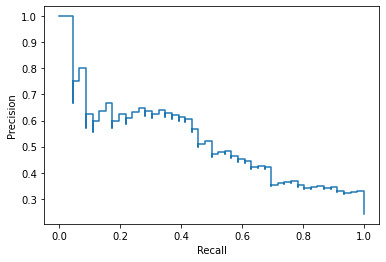

In [159]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calcul de la courbe précision/rappel
precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix_up, flaten_matrix_corr1_up)

# Affichage de la courbe
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()

plt.show()


## Question 5

In [166]:
from sklearn.metrics import average_precision_score

average_precision_score(flaten_causal_matrix_up, flaten_matrix_corr1_up)

0.5232415723984428